## **Fraud Detection with Naive Bayes Classifier vs other machine learning modeles**



## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

## Read File

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
print(df.shape)

(284807, 31)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

'Since all variables are of float and int type, so this data is easy to handle for modeling'

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Cleaning Data

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


Check Class variables that has 0 value for Genuine transactions and 1 for Fraud


Classes as pie chart:


Text(0, 0.5, '')

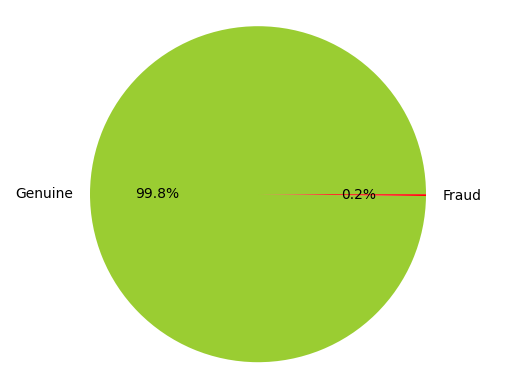

In [ ]:
print("Classes as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

In [ ]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:
X = df.drop(['Class'],axis=1)
y = df['Class']

## model_1_NB

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(X_train1, y_train1)

GaussianNB()

In [ ]:
print("Accuracy on training set: {:.3f}".format(classifier1.score(X_train1, y_train1)))


Accuracy on training set: 0.993


In [ ]:
print("Accuracy on test set: {:.3f}".format(classifier1.score(X_test1, y_test1)))

Accuracy on test set: 0.993


In [ ]:
y_pred1 = classifier1.predict(X_test1)

In [ ]:
print(accuracy_score(y_test1, y_pred1))

0.9926091078262701


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56861
           1       0.14      0.61      0.23       101

    accuracy                           0.99     56962
   macro avg       0.57      0.80      0.61     56962
weighted avg       1.00      0.99      0.99     56962



## Model_2_svm

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'poly',  C= 1.0 , degree = 2 , random_state = 0)
classifier2.fit(X_train2, y_train2)

SVC(degree=2, kernel='poly', random_state=0)

In [ ]:
print("Accuracy on training set: {:.3f}".format(classifier2.score(X_train2, y_train2)))


Accuracy on training set: 0.998


In [ ]:
print("Accuracy on test set: {:.3f}".format(classifier2.score(X_test2, y_test2)))


Accuracy on test set: 0.998


In [ ]:
y_pred2 = classifier2.predict(X_test2)


In [ ]:
print(accuracy_score(y_test2, y_pred2))


0.9982268881008391


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.00      0.00      0.00       101

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model_3_RandomForset

In [ ]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train3, y_train3)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
print("Accuracy on training set: {:.3f}".format(classifier3.score(X_train3, y_train3)))
print("Accuracy on test set: {:.3f}".format(classifier3.score(X_test3, y_test3)))


Accuracy on training set: 1.000
Accuracy on test set: 0.999


In [ ]:
y_pred3 = classifier1.predict(X_test3)
print(accuracy_score(y_test3, y_pred3))


0.9926091078262701


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56861
           1       0.14      0.61      0.23       101

    accuracy                           0.99     56962
   macro avg       0.57      0.80      0.61     56962
weighted avg       1.00      0.99      0.99     56962



## preprocessing

Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

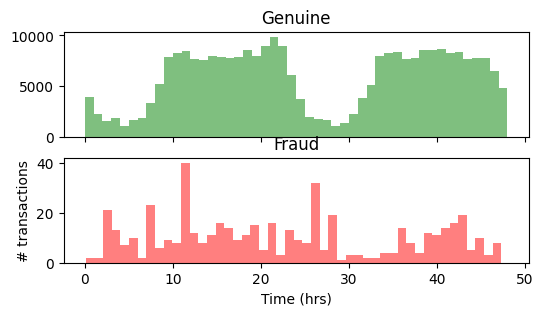

In [ ]:
print("Time variable")
df["Time_Hr"] = df["Time"]/3600   # convert to hours
print(df["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

number of transactions have almost similar dependence on time of the day for both the classes. So, I believe this feature does not yield any predictive power to distinguish between the two classes.

In [ ]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hr
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278


In [ ]:
df = df.drop(['Time'],axis=1)

Text(0, 0.5, '# transactions')

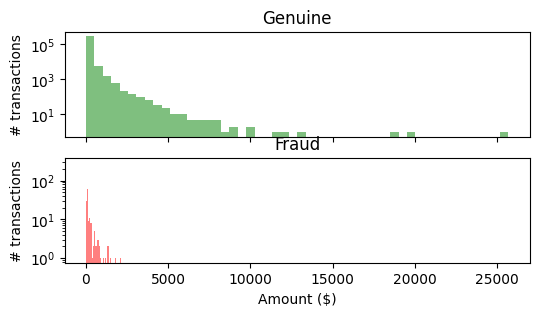

In [ ]:
#check feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

"all transaction amounts > 10K in Genuine Class only". Also this amount feature is not on same scale as principle components. So, standardize the values of the 'Amount' feature using StandardScalar

In [ ]:
from sklearn.preprocessing import StandardScaler

df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop( ['Amount'],axis=1)

In [ ]:
df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hr,scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.000000,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000000,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.000278,1.160686


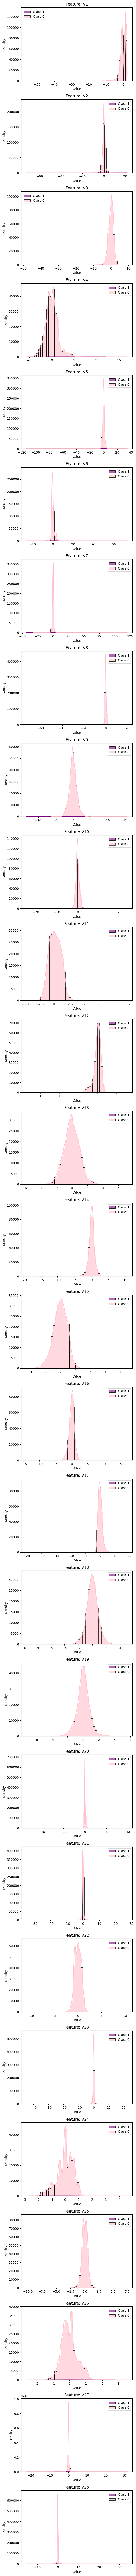

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Suppress warnings
warnings.filterwarnings("ignore")

# Parameters for the grid
num_features = len(df.columns[:28])  # Assuming first 28 columns are principal components
plt.figure(figsize=(6, num_features * 4))  # Adjust figure size dynamically

# Create a grid layout
gs = gridspec.GridSpec(num_features, 1)

# Loop through each principal component and plot distributions
for i, col in enumerate(df.columns[:28]):  # Loop through the first 28 columns
    ax = plt.subplot(gs[i])  # Create a subplot for the current feature

    # Plot histograms for Class 1 and Class 0
    sns.histplot(df[df['Class'] == 1][col], bins=50, color='purple', label='Class 1', kde=True, ax=ax, alpha=0.6)
    sns.histplot(df[df['Class'] == 0][col], bins=50, color='pink', label='Class 0', kde=True, ax=ax, alpha=0.6)

    # Set titles and labels
    ax.set_title(f'Feature: {col}', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)

    # Add legend
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



some of features have very similar shapes for the two types of transactions (Classes) , potentially leading to overfitting. so I belive that dropping them should help to reduce the model complexity and thus increase the classifier sensitivity.

## Model_NB_After sclaed amount features

In [ ]:
X1 = df.drop(['Class'],axis=1)
y1 = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X1, y1, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf4 = GaussianNB()
clf4.fit(X_train4, y_train4)
print("Accuracy on training set: {:.3f}".format(clf4.score(X_train4, y_train4)))
print("Accuracy on test set: {:.3f}".format(clf4.score(X_test4, y_test4)))


Accuracy on training set: 0.978
Accuracy on test set: 0.978


In [ ]:
y_pred4 = clf4.predict(X_test4)
print(accuracy_score(y_test4, y_pred4))
from sklearn.metrics import classification_report
print(classification_report(y_test4, y_pred4))

0.9782311014360451
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.07      0.85      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962



## Model_NB_After_drop some of principle components that have similar distributions in above plots

In [ ]:
df_new = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'] ,axis=1)

In [ ]:
X2 = df_new.drop(['Class'],axis=1)
y2 = df_new['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X2, y2, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB5 = GaussianNB()
NB5.fit(X_train5, y_train5)
print("Accuracy on training set: {:.3f}".format(NB5.score(X_train5, y_train5)))
print("Accuracy on test set: {:.3f}".format(NB5.score(X_test5, y_test5)))


Accuracy on training set: 0.984
Accuracy on test set: 0.985


In [ ]:
y_pred5 = NB5.predict(X_test5)
print(accuracy_score(y_test5, y_pred5))
from sklearn.metrics import classification_report
print(classification_report(y_test5, y_pred5))

0.9846564376250834
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.09      0.87      0.17       101

    accuracy                           0.98     56962
   macro avg       0.55      0.93      0.58     56962
weighted avg       1.00      0.98      0.99     56962



## Model_NB_After_drop some of principle components + Time

In [ ]:
df_new_2 = df.drop(['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'] ,axis=1)


In [ ]:
X3 = df_new_2.drop(['Class'],axis=1)
y3 = df_new_2['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split(X3, y3, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB6 = GaussianNB()
NB6.fit(X_train6, y_train6)
print("Accuracy on training set: {:.3f}".format(NB6.score(X_train6, y_train6)))
print("Accuracy on test set: {:.3f}".format(NB6.score(X_test6, y_test6)))

Accuracy on training set: 0.984
Accuracy on test set: 0.985


In [ ]:
y_pred6 = NB6.predict(X_test6)
print(accuracy_score(y_test6, y_pred6))
from sklearn.metrics import classification_report
print(classification_report(y_test6, y_pred6))

0.9845862153716513
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.09      0.87      0.17       101

    accuracy                           0.98     56962
   macro avg       0.55      0.93      0.58     56962
weighted avg       1.00      0.98      0.99     56962



 by comapring NB6 scores with NB5 scores, "Time_Hr" is not helping much in classification. So, I can remove it safely.

## Model_NB_After_drop some of principle components + Time + 'scaled_Amount'

In [ ]:
df_new_3 = df.drop(['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'] ,axis=1)

In [ ]:
X4 = df_new_3.drop(['Class'],axis=1)
y4 = df_new_3['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7, y_test7 = train_test_split(X4, y4, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB7 = GaussianNB()
NB7.fit(X_train7, y_train7)
print("Accuracy on training set: {:.3f}".format(NB7.score(X_train7, y_train7)))
print("Accuracy on test set: {:.3f}".format(NB7.score(X_test7, y_test7)))


Accuracy on training set: 0.984
Accuracy on test set: 0.985


In [ ]:
y_pred7 = NB7.predict(X_test7)
print(accuracy_score(y_test7, y_pred7))
from sklearn.metrics import classification_report
print(classification_report(y_test7, y_pred7))

0.9849724377655279
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56861
           1       0.09      0.87      0.17       101

    accuracy                           0.98     56962
   macro avg       0.55      0.93      0.58     56962
weighted avg       1.00      0.98      0.99     56962



## LR check recall score for logistic regression


In [ ]:
df_new_3.head(3)

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X4, y4, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf8 = LogisticRegression()
clf8.fit(X_train8, y_train8)

LogisticRegression()

In [ ]:
print("Accuracy on training set: {:.3f}".format(clf8.score(X_train8, y_train8)))
print("Accuracy on test set: {:.3f}".format(clf8.score(X_test8, y_test8)))

Accuracy on training set: 0.999
Accuracy on test set: 0.999


In [ ]:
y_pred8 = clf8.predict(X_test8)
print(accuracy_score(y_test8, y_pred8))
from sklearn.metrics import classification_report
print(classification_report(y_test8, y_pred8))

0.9991573329588147
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.90      0.59      0.71       101

    accuracy                           1.00     56962
   macro avg       0.95      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962



## svm check recall score for svm

In [ ]:
from sklearn.model_selection import train_test_split
X_train9, X_test9, y_train9, y_test9 = train_test_split(X4, y4, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.svm import SVC
svm2 = SVC(kernel = 'poly', C= 1.0 , degree = 3 ,random_state = 0)
svm2.fit(X_train9, y_train9)

SVC(kernel='poly', random_state=0)

In [ ]:
print("Accuracy on training set: {:.3f}".format(svm2.score(X_train9, y_train9)))
print("Accuracy on test set: {:.3f}".format(svm2.score(X_test9, y_test9)))

Accuracy on training set: 1.000
Accuracy on test set: 0.999


In [ ]:
y_pred9 = svm2.predict(X_test9)
print(accuracy_score(y_test9, y_pred9))
from sklearn.metrics import classification_report
print(classification_report(y_test9, y_pred9))

0.999420666409185
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.91      0.74      0.82       101

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



## OneClassSVM

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , accuracy_score

In [ ]:
X_train10, X_test10, y_train10, y_test10 = train_test_split(X4 ,  y4, test_size=0.2, random_state=42)

In [ ]:
clf_svm = OneClassSVM(kernel= 'rbf', degree=3, gamma=0.1, nu=0.01)
clf_svm.fit(X_train10)

OneClassSVM(gamma=0.1, nu=0.01)

In [ ]:
y_pred10 = clf_svm.predict(X_test10)


In [ ]:
y_pred10 = pd.Series(y_pred10).replace([-1,1],[1,0])

In [ ]:
print(accuracy_score(y_test10, y_pred10))


0.9774059899582178


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test10, y_pred10))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.76      0.10        98

    accuracy                           0.98     56962
   macro avg       0.53      0.87      0.55     56962
weighted avg       1.00      0.98      0.99     56962



## TRY_PCA

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hr,scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.000000,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000000,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.000278,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.000278,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.000556,-0.073403


In [ ]:
X5 = df.drop(['Class'],axis=1)
y5 = df['Class']

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)
X_pca = pca.fit_transform(X5)
X_pca

array([[-2.64597338e+01, -8.22582837e-01,  8.66250862e-02, ...,
         2.83794434e-01, -1.26047412e-01, -1.40137689e-02],
       [-2.63111364e+01,  1.61155929e+00, -1.31405462e-01, ...,
        -2.52836842e-01,  6.78127619e-02,  1.72987790e-01],
       [-2.64537096e+01, -1.39165310e+00, -1.60778741e+00, ...,
         1.16322420e+00,  2.91466177e-02, -2.39112578e+00],
       ...,
       [ 2.18175617e+01,  1.26433296e+00, -6.32116943e-01, ...,
         6.37739402e-01,  1.10710765e-01, -6.15750946e-01],
       [ 2.15717410e+01, -2.42295545e-01,  7.68500421e-01, ...,
         1.37310610e+00, -9.47751992e-01,  1.07010266e+00],
       [ 2.16275490e+01, -9.41550981e-01, -1.43539954e-01, ...,
        -3.32408872e-01,  3.57048760e-01, -4.01506870e-01]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train11, X_test11, y_train11, y_test11 = train_test_split(X_pca, y5, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB8 = GaussianNB()
NB8.fit(X_train11, y_train11)
print("Accuracy on training set: {:.3f}".format(NB8.score(X_train11, y_train11)))
print("Accuracy on test set: {:.3f}".format(NB8.score(X_test11, y_test11)))

Accuracy on training set: 0.983
Accuracy on test set: 0.983


In [ ]:
y_pred11 = NB8.predict(X_test11)
print(accuracy_score(y_test11, y_pred11))
from sklearn.metrics import classification_report
print(classification_report(y_test11, y_pred11))

0.9832695481197992
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.08      0.85      0.15       101

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



## SMOTE

In [ ]:
X4

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.213454
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.214205
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.232045
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.265245


In [ ]:
X_train12 , X_test12 , y_train12 , y_test12 = train_test_split(X4 , y4 , test_size=0.2 , random_state=42 )

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_trains, y_trains = oversample.fit_resample(X_train12, y_train12)

In [ ]:
print(df_new_3['Class'].value_counts())

In [ ]:
model_LR= LogisticRegression()
model_LR.fit(x_trains , y_trains)

LogisticRegression()

In [ ]:
model_LR_predict = model_LR.predict(X_test12)

In [ ]:
model_LR_score_train = model_LR.score(x_trains, y_trains)
print(r'model_LR_score_train = ', model_LR_score_train * 100)

model_LR_score_train =  93.8797807000189


In [ ]:
model_LR_score_test = model_LR.score(X_test12 , y_test12)
print(r'model_LR_score_test = ' , model_LR_score_test * 100)

model_LR_score_test =  97.54924335521928


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test12 , model_LR_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.90      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
model_NB = GaussianNB()
model_NB.fit(x_trains , y_trains)
print(r'model_NB_score_train = ' , model_NB.score(x_trains , y_trains) * 100)
print(r'model_NB_score_test = ' , model_NB.score(X_test12 , y_test12) * 100)

model_NB_score_train =  91.44606970292503
model_NB_score_test =  98.06713247428111


In [ ]:
y_pred_NB = model_NB.predict(X_test12)
print(accuracy_score(y_test12, y_pred_NB))
from sklearn.metrics import classification_report
print(classification_report(y_test12, y_pred_NB))

0.980671324742811
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.87      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962



## Comparison_Model

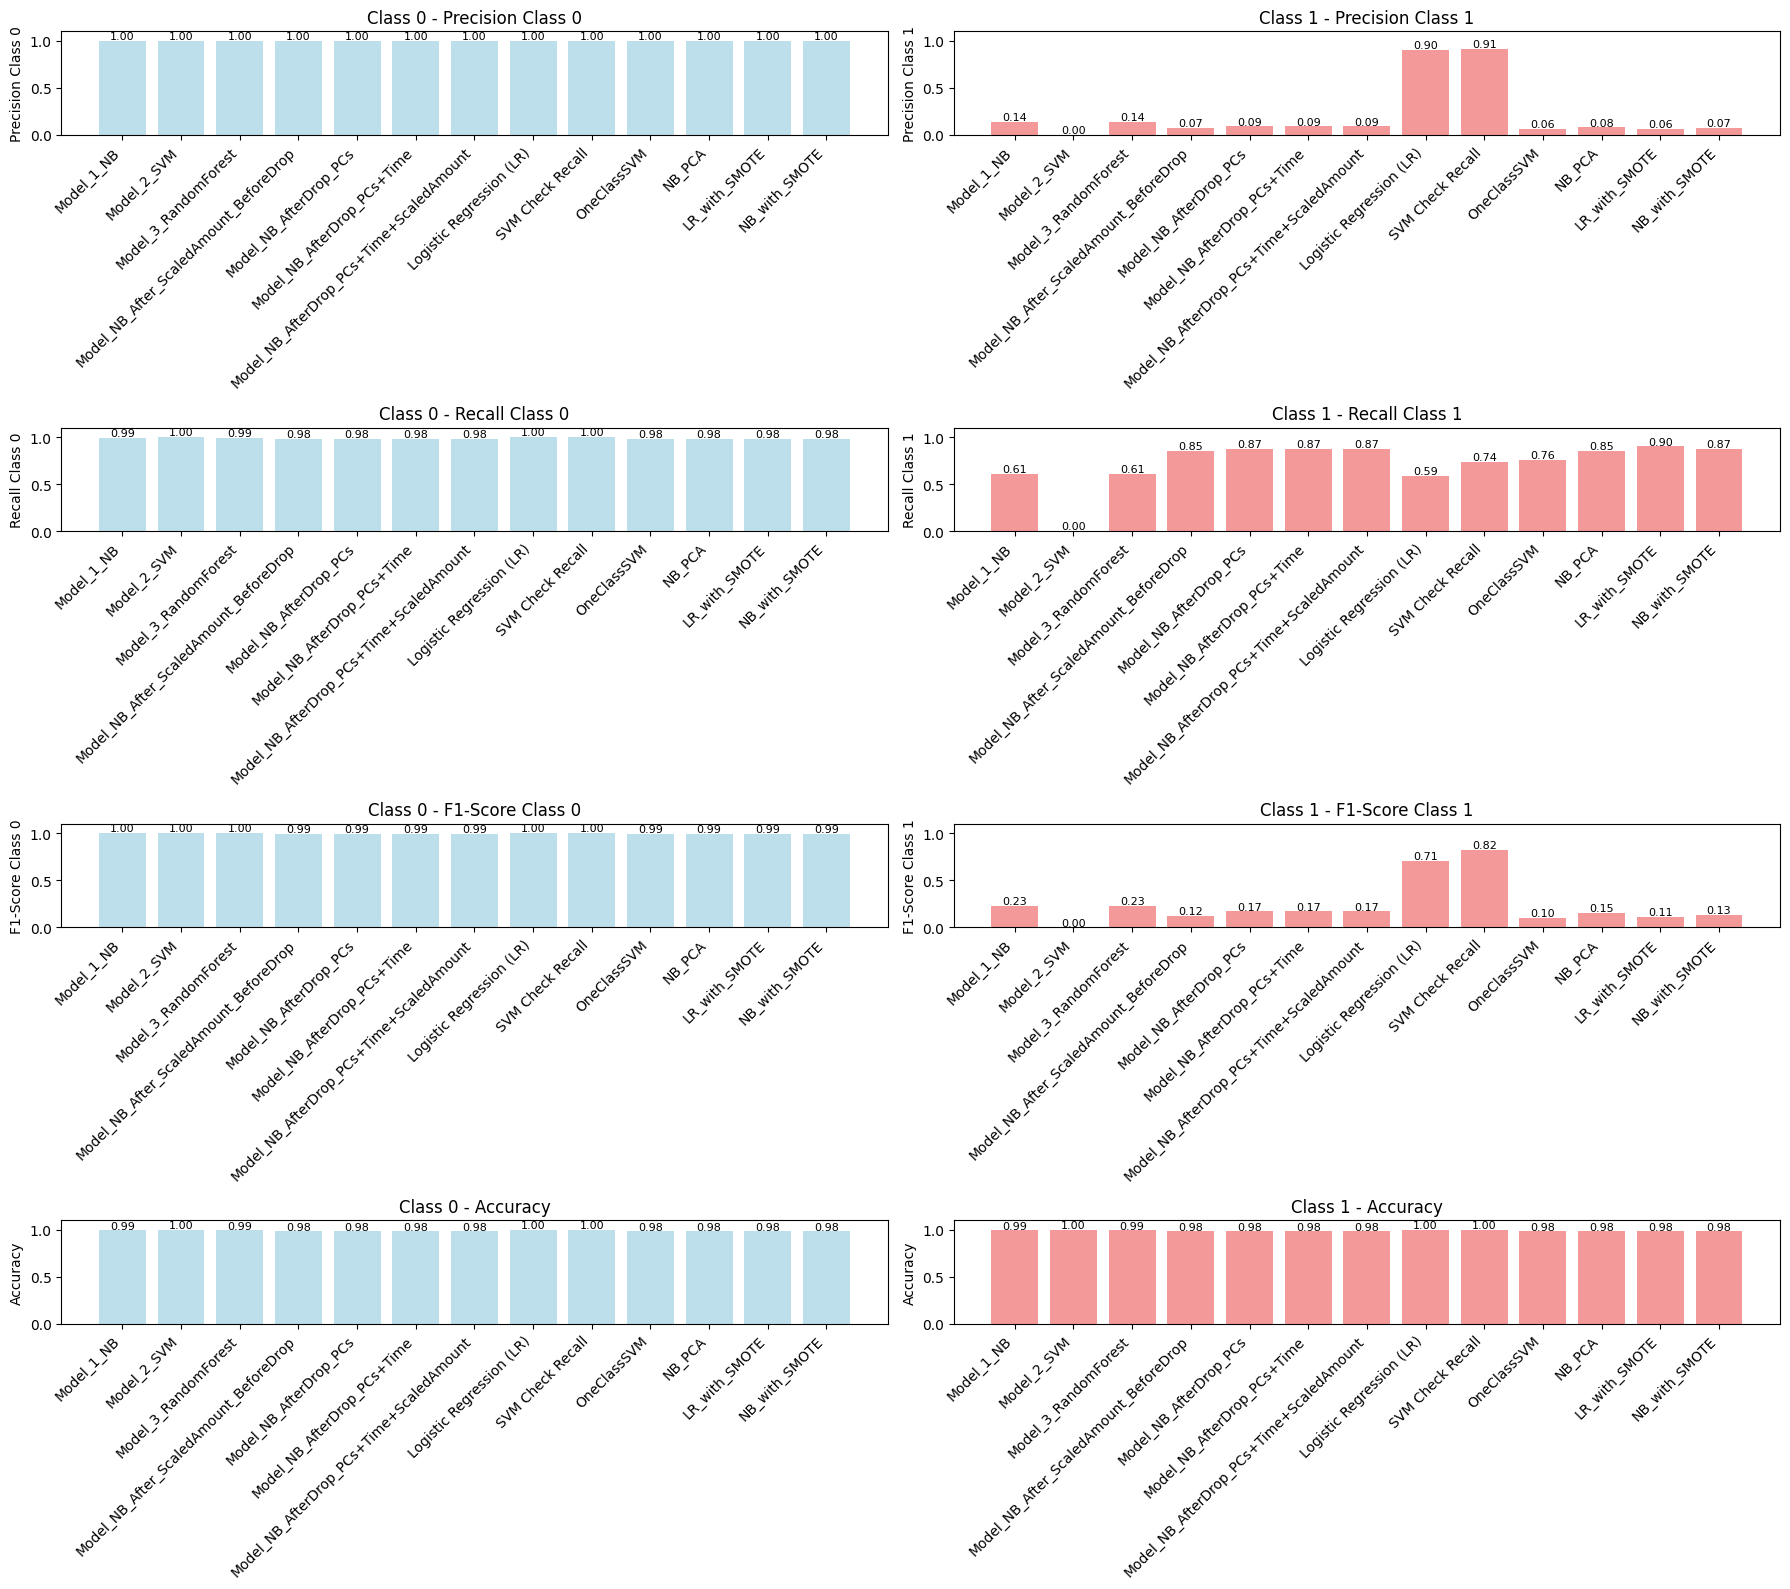

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Classification report data for each model
models = [
    "Model_1_NB",
    "Model_2_SVM",
    "Model_3_RandomForest",
    "Model_NB_After_ScaledAmount_BeforeDrop",
    "Model_NB_AfterDrop_PCs",
    "Model_NB_AfterDrop_PCs+Time",
    "Model_NB_AfterDrop_PCs+Time+ScaledAmount",
    "Logistic Regression (LR)",
    "SVM Check Recall",
    "OneClassSVM",
    "NB_PCA",
    "LR_with_SMOTE",
    "NB_with_SMOTE"
]

# Corresponding metrics for each model (precision, recall, f1-score, accuracy)
metrics = {
    "Precision_Class_0": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
    "Recall_Class_0": [0.99, 1.00, 0.99, 0.98, 0.98, 0.98, 0.98, 1.00, 1.00, 0.98, 0.98, 0.98, 0.98],
    "F1-Score_Class_0": [1.00, 1.00, 1.00, 0.99, 0.99, 0.99, 0.99, 1.00, 1.00, 0.99, 0.99, 0.99, 0.99],
    "Precision_Class_1": [0.14, 0.00, 0.14, 0.07, 0.09, 0.09, 0.09, 0.90, 0.91, 0.06, 0.08, 0.06, 0.07],
    "Recall_Class_1": [0.61, 0.00, 0.61, 0.85, 0.87, 0.87, 0.87, 0.59, 0.74, 0.76, 0.85, 0.90, 0.87],
    "F1-Score_Class_1": [0.23, 0.00, 0.23, 0.12, 0.17, 0.17, 0.17, 0.71, 0.82, 0.10, 0.15, 0.11, 0.13],
    "Accuracy": [0.99, 1.00, 0.99, 0.98, 0.98, 0.98, 0.98, 1.00, 1.00, 0.98, 0.98, 0.98, 0.98]
}

# Create a DataFrame for better organization
df_metrics = pd.DataFrame(metrics, index=models)

# Define metrics for both Class 0 and Class 1
class_0_metrics = ["Precision_Class_0", "Recall_Class_0", "F1-Score_Class_0", "Accuracy"]
class_1_metrics = ["Precision_Class_1", "Recall_Class_1", "F1-Score_Class_1", "Accuracy"]

# Create subplots
fig, ax = plt.subplots(4, 2, figsize=(18, 16))
x = np.arange(len(models))

# Plot Class 0 metrics
for i, metric in enumerate(class_0_metrics):
    ax[i, 0].bar(x, df_metrics[metric], color='lightblue', alpha=0.8)
    ax[i, 0].set_xticks(x)
    ax[i, 0].set_xticklabels(models, rotation=45, ha='right')
    ax[i, 0].set_title(f"Class 0 - {metric.replace('_', ' ').title()}")
    ax[i, 0].set_ylim(0, 1.1)
    ax[i, 0].set_ylabel(metric.replace('_', ' ').title())
    for j, v in enumerate(df_metrics[metric]):
        ax[i, 0].text(j, v + 0.02, f"{v:.2f}", ha='center', fontsize=8)

# Plot Class 1 metrics
for i, metric in enumerate(class_1_metrics):
    ax[i, 1].bar(x, df_metrics[metric], color='lightcoral', alpha=0.8)
    ax[i, 1].set_xticks(x)
    ax[i, 1].set_xticklabels(models, rotation=45, ha='right')
    ax[i, 1].set_title(f"Class 1 - {metric.replace('_', ' ').title()}")
    ax[i, 1].set_ylim(0, 1.1)
    ax[i, 1].set_ylabel(metric.replace('_', ' ').title())
    for j, v in enumerate(df_metrics[metric]):
        ax[i, 1].text(j, v + 0.02, f"{v:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()


As we see, by learning from full imbalanced dataset this default logistic regressor performs very poorly. So let us try to train it in tradional way i.e. from under-sampled data. So, take only that percent of genuine-class cases which is equal to all fraud-classes i.e. consider 50/50 ratio of both classes.